In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
disease_types = ['Pepper_Bacterial','Pepper_healthy','Potato_Early_blight','Potato_healthy','Potato_Late_blight','Tomato_Bacterial',
                'Tomato_Curl_Virus','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_mosaic',
                'Tomato_Septoria_leaf_spot','Tomato_spider_mite','Tomato_Target_Spot']
data_dir = '/Users/michaellaraglione/Documents/GitHub/Capstone3/PlantVillage/'
train_dir = os.path.join(data_dir)

In [3]:
train_data = []
for diseases, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), diseases, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'Disease_ID','Disease_Type'])
train.head(5)

,File,Disease_ID,Disease_Type
0,Pepper_Bacterial/47fbd17d-c078-4465-8816-c675a...,0,Pepper_Bacterial
1,Pepper_Bacterial/42ef264d-f255-4674-885a-0921a...,0,Pepper_Bacterial
2,Pepper_Bacterial/435993b8-c7f7-47fd-85ad-bdb04...,0,Pepper_Bacterial
3,Pepper_Bacterial/1fca0f2b-857b-4cef-9218-42b1b...,0,Pepper_Bacterial
4,Pepper_Bacterial/9cee73cb-272f-4121-b82d-c8c2b...,0,Pepper_Bacterial


In [4]:
seed = 45
train = train.sample(frac=1, random_state = seed)
train_index = np.arange(len(train)) #to reset the indices
train.head()

,File,Disease_ID,Disease_Type
3046,Potato_Early_blight/acff9d5e-4b38-4817-a239-93...,2,Potato_Early_blight
6803,Tomato_Curl_Virus/31945578-c927-474f-b807-1788...,6,Tomato_Curl_Virus
10112,Tomato_Early_blight/9b0106a7-eb90-4bb2-beec-6c...,7,Tomato_Early_blight
3126,Potato_Early_blight/4849de96-2e26-4c8d-8944-bd...,2,Potato_Early_blight
5008,Tomato_Bacterial/6c300ff6-c94d-4065-8354-73a14...,5,Tomato_Bacterial


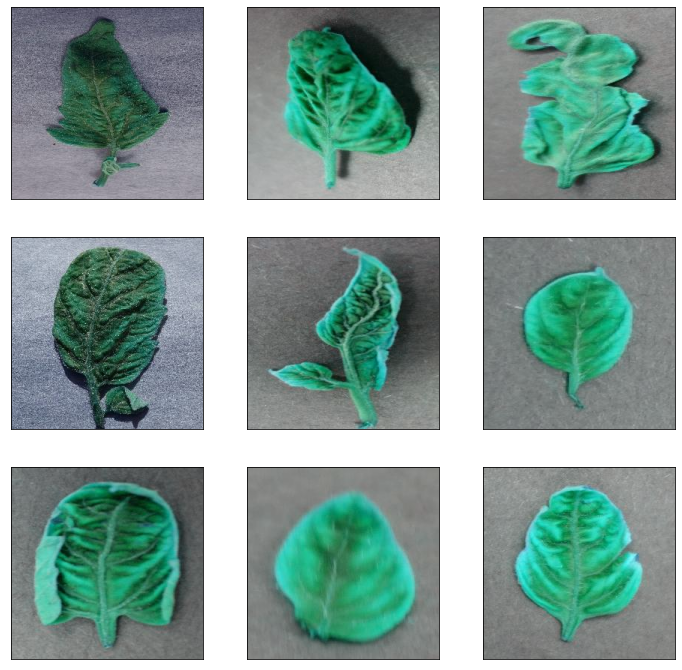

In [6]:
def disease_type(disease_type, rows, cols):
    fig,ax = plt.subplots(rows, cols, figsize=(12,12))
    disease_type = train['File'][train['Disease_Type'] == disease_type].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, disease_type[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
disease_type('Tomato_Curl_Virus', 3, 3)

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split = 0.2)
validation_generator = datagen.flow_from_directory(
    data_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb",
    class_mode="categorical")

train_generator = datagen.flow_from_directory(
    data_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical")

Found 20638 images belonging to 15 classes.
Found 16516 images belonging to 15 classes.


In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(units=120, activation='relu'),
    keras.layers.Dense(units=84, activation='relu'),
    keras.layers.Dense(units=15, activation = 'softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 6)       168       
_________________________________________________________________
average_pooling2d (AveragePo (None, 127, 127, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 16)      880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 62, 62, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               7380600   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [9]:
batch_size = 32
epochs = 30

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_generator, batch_size=batch_size, epochs=epochs, validation_data=validation_generator)

Epoch 1/30
517/517 [==============================] - 188s 362ms/step - loss: 1.6873 - accuracy: 0.4598 - val_loss: 0.5830 - val_accuracy: 0.8166
Epoch 2/30
517/517 [==============================] - 191s 370ms/step - loss: 0.5154 - accuracy: 0.8285 - val_loss: 0.5147 - val_accuracy: 0.8214
Epoch 3/30
517/517 [==============================] - 184s 356ms/step - loss: 0.2596 - accuracy: 0.9153 - val_loss: 0.2093 - val_accuracy: 0.9356
Epoch 4/30
517/517 [==============================] - 186s 360ms/step - loss: 0.1180 - accuracy: 0.9622 - val_loss: 0.1773 - val_accuracy: 0.9507
Epoch 5/30
517/517 [==============================] - 186s 360ms/step - loss: 0.0908 - accuracy: 0.9705 - val_loss: 0.2764 - val_accuracy: 0.9184
Epoch 6/30
517/517 [==============================] - 190s 368ms/step - loss: 0.0854 - accuracy: 0.9700 - val_loss: 0.2235 - val_accuracy: 0.9393
Epoch 7/30
517/517 [==============================] - 185s 358ms/step - loss: 0.0544 - accuracy: 0.9847 - val_loss: 0.2517 -

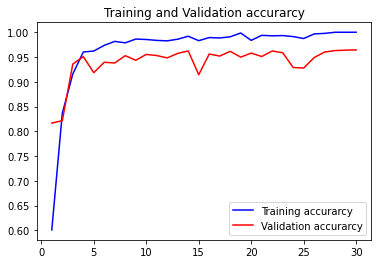

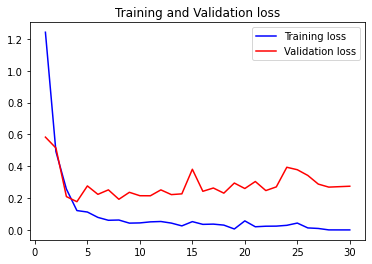

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
history.history.keys()